<h2> the model</h2>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
# getting data
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [7]:
# for data cleaning
# Check for and handle missing values
# Feature selection: Use only 'Close' price as the target variable
def preprocess_data(data):
    data.dropna(inplace=True)
    data = data[['Close']]
    return data

In [3]:
# code to train the model
def train_polynomial_regression(data, degree):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Close'].values.reshape(-1, 1)

    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    return model

In [5]:
# ploting graph
def plot_polynomial_regression(data, model, degree):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Close'].values.reshape(-1, 1)
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    y_pred = model.predict(X_poly)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Prices')
    plt.plot(X, y_pred, color='red', label='Polynomial Regression (Degree {})'.format(degree))
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Google Share Prices - Polynomial Regression')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


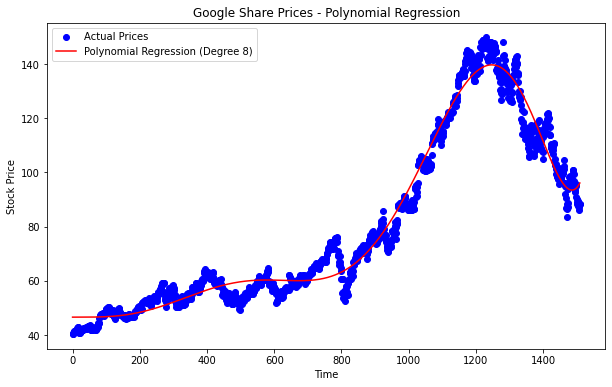

In [9]:
# main function of sorts
if __name__ == "__main__":
    ticker = "GOOGL"
    start_date = "2017-01-01"
    end_date = "2022-12-31"
    degree = 8

    # Fetch historical stock data from Yahoo Finance
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    # for data cleaning
    data = preprocess_data(stock_data)

    # Train polynomial regression model
    model = train_polynomial_regression(stock_data, degree)

    # Plot the results
    plot_polynomial_regression(stock_data, model, degree)